In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
# Define user-defined functions for non-linear filters

def median_filter(img, kernel_size):
    return cv2.medianBlur(img, kernel_size)

In [4]:
def max_filter(img, kernel_size):
    return cv2.dilate(img, np.ones((kernel_size, kernel_size), np.uint8))


In [5]:
def min_filter(img, kernel_size):
    return cv2.erode(img, np.ones((kernel_size, kernel_size), np.uint8))

In [6]:
def mid_point_filter(img, kernel_size):
    max_img = max_filter(img, kernel_size)
    min_img = min_filter(img, kernel_size)
    return (max_img.astype(np.float32) + min_img.astype(np.float32)) / 2.0

In [7]:
def alpha_trimmed_filter(img, kernel_size, d):
    pad = kernel_size // 2
    result = np.zeros_like(img, dtype=np.uint8)
    for i in range(pad, img.shape[0] - pad):
        for j in range(pad, img.shape[1] - pad):
            neighbors = img[i-pad:i+pad+1, j-pad:j+pad+1]
            neighbors_flat = np.sort(neighbors.flatten())
            trimmed_mean = np.mean(neighbors_flat[d:-d])
            result[i, j] = np.clip(trimmed_mean, 0, 255).astype(np.uint8)
    return result

In [8]:
# Load input image
input_image = cv2.imread('/content/IMG-20240206-WA0035 (1).jpg', cv2.IMREAD_GRAYSCALE)


Original Image:


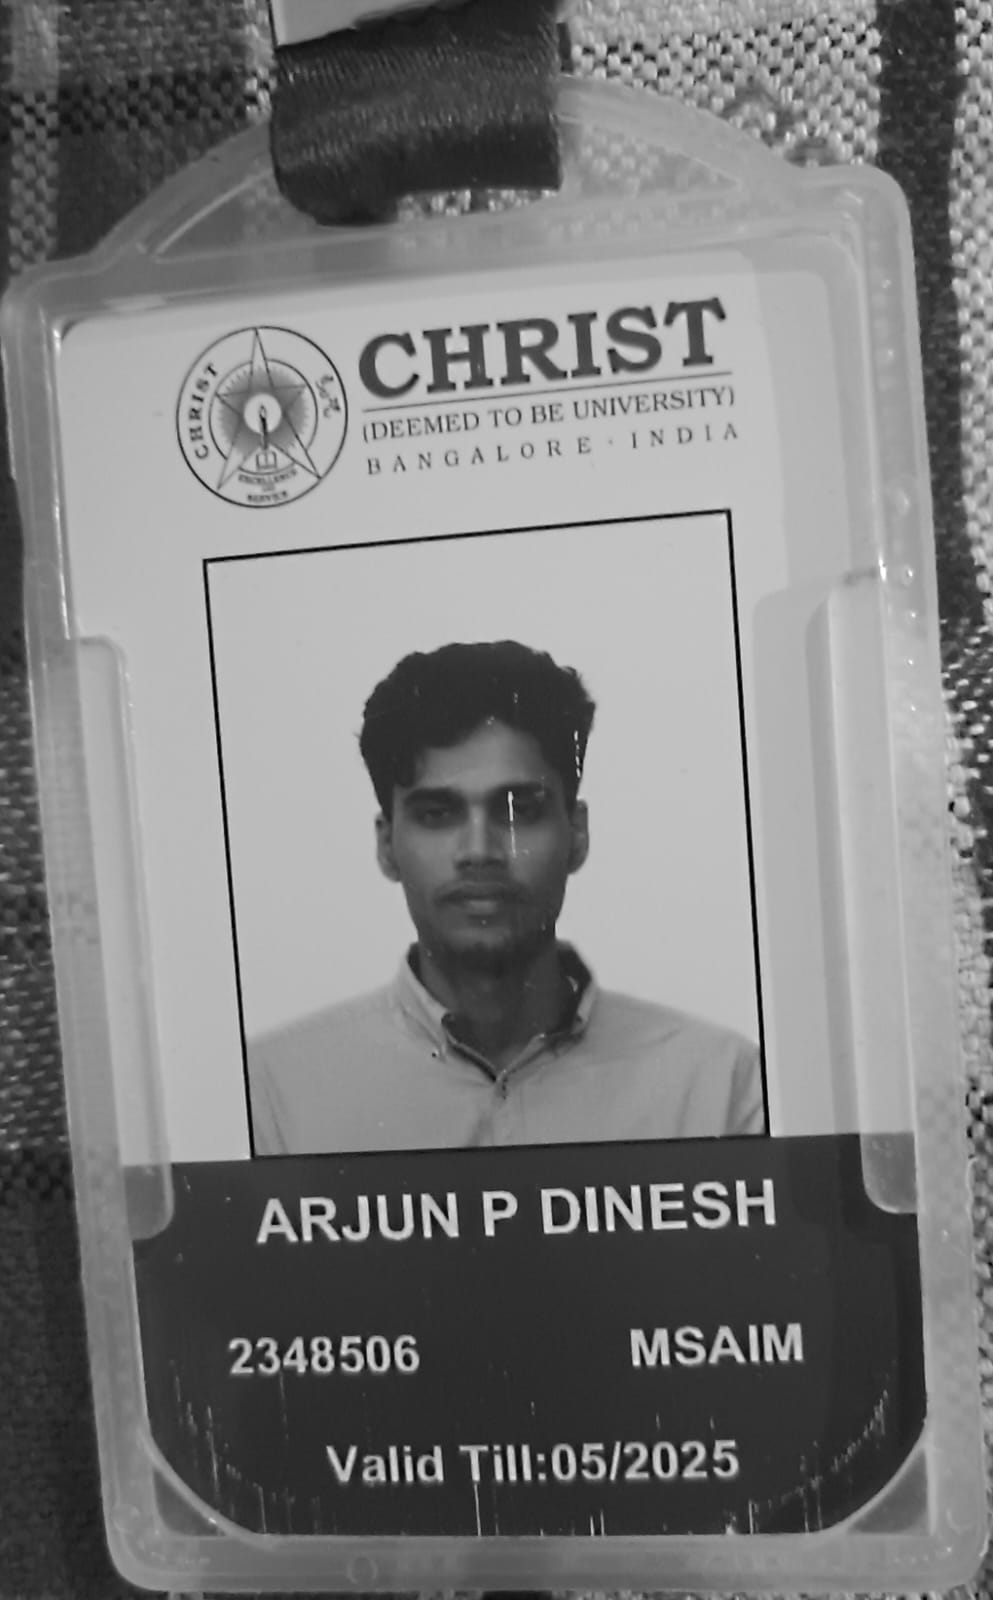

In [9]:
# Display original image
print("Original Image:")
cv2_imshow(input_image)

Median Filtered Image:


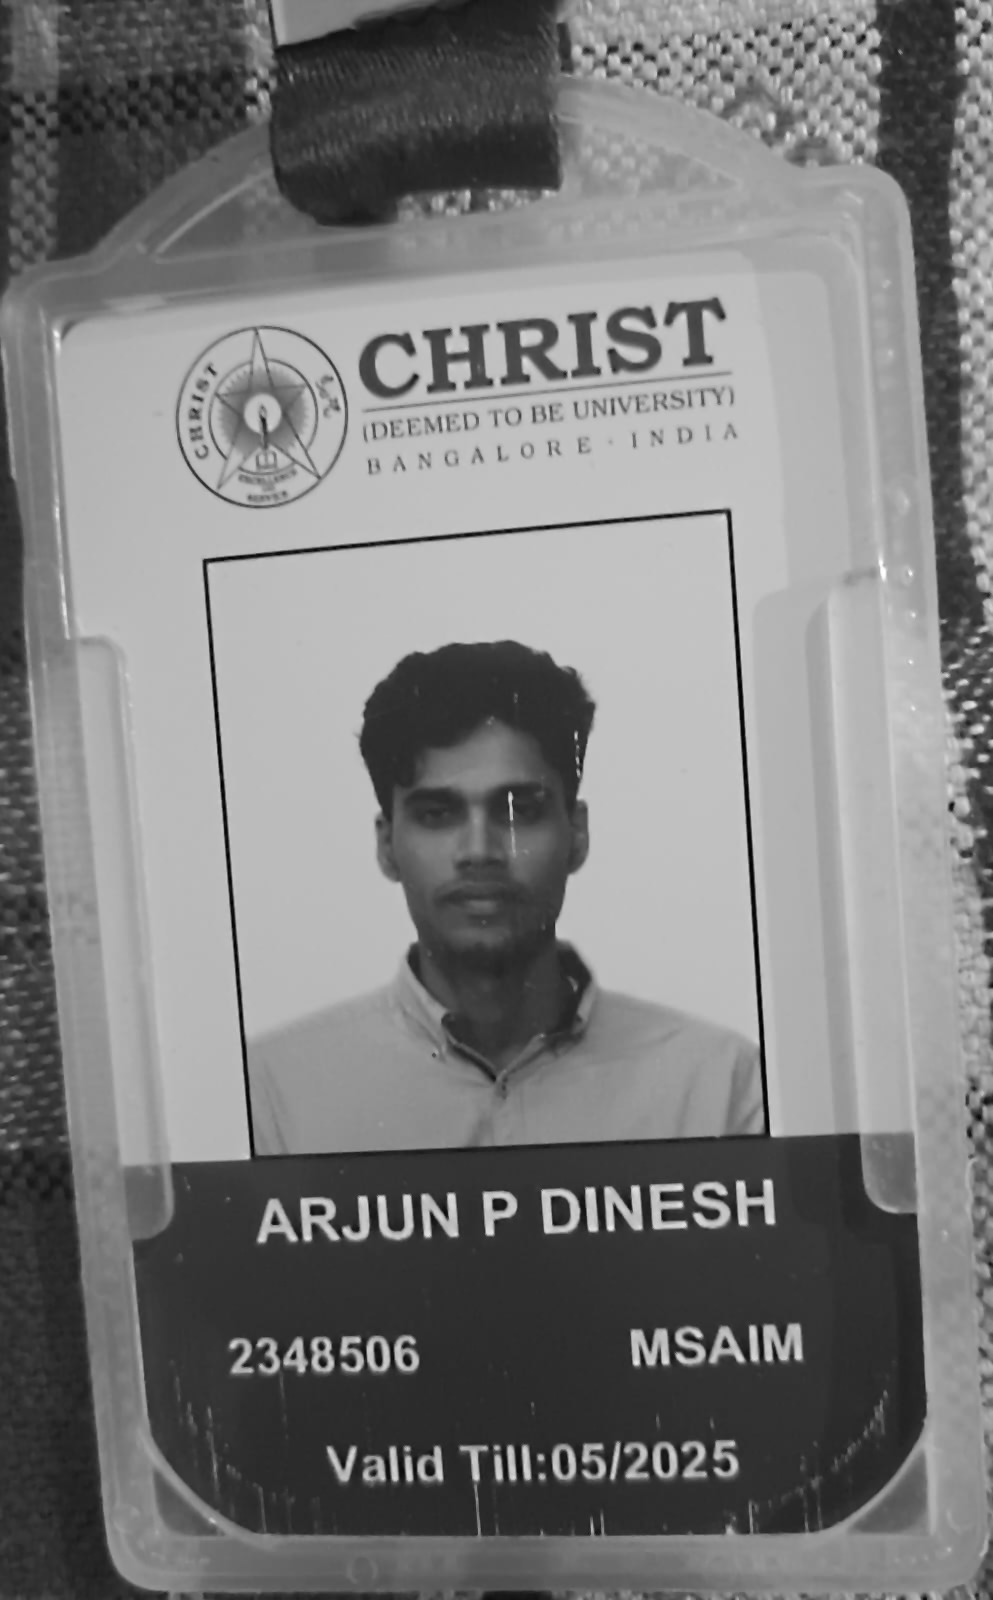

In [10]:
# Apply median filter and display
median_filtered = median_filter(input_image, 3)
print("Median Filtered Image:")
cv2_imshow(median_filtered)

Max Filtered Image:


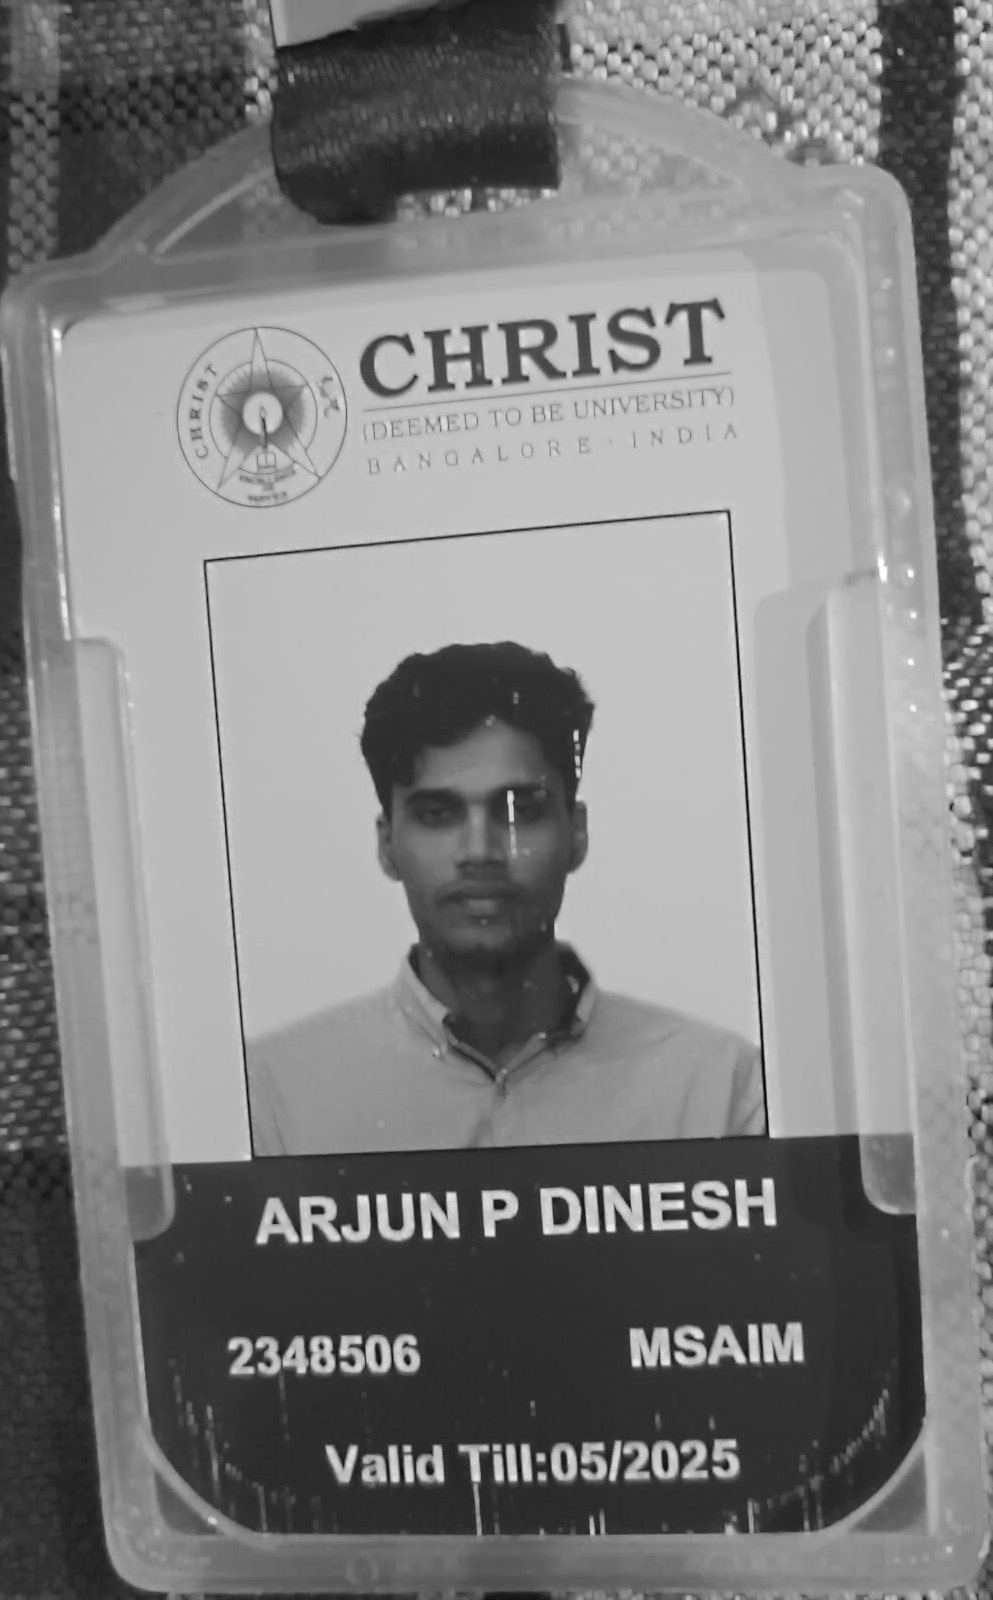

In [11]:
# Apply max filter and display
max_filtered = max_filter(input_image, 3)
print("Max Filtered Image:")
cv2_imshow(max_filtered)

Min Filtered Image:


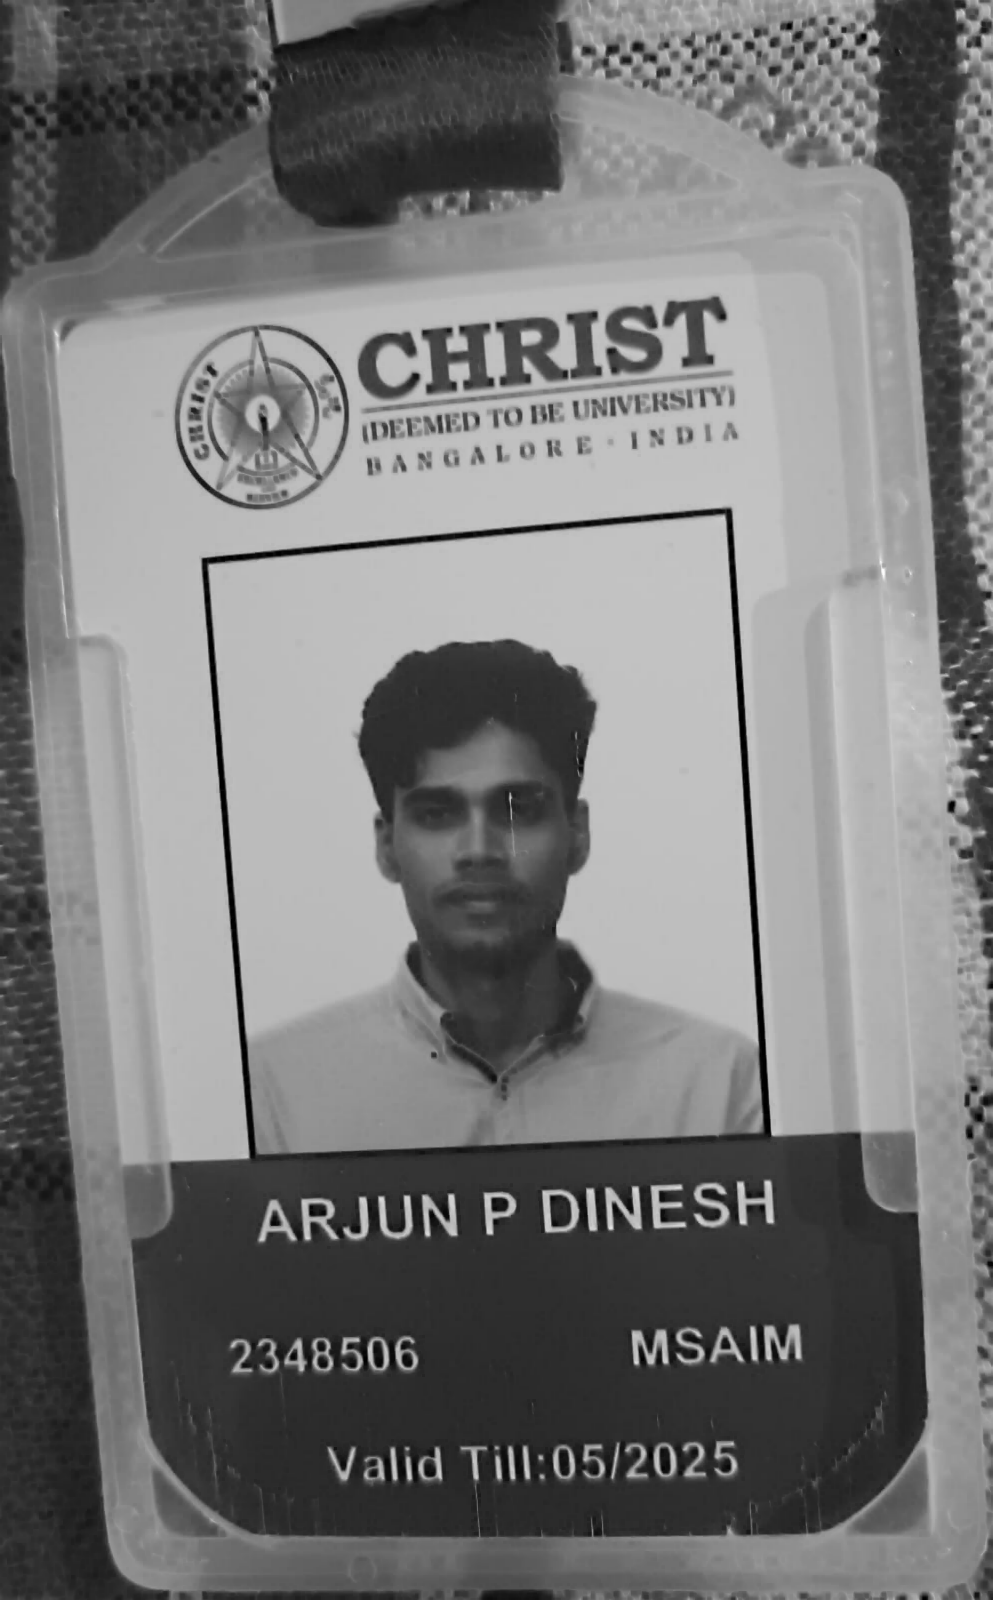

In [12]:
# Apply min filter and display
min_filtered = min_filter(input_image, 3)
print("Min Filtered Image:")
cv2_imshow(min_filtered)

Mid-point Filtered Image:


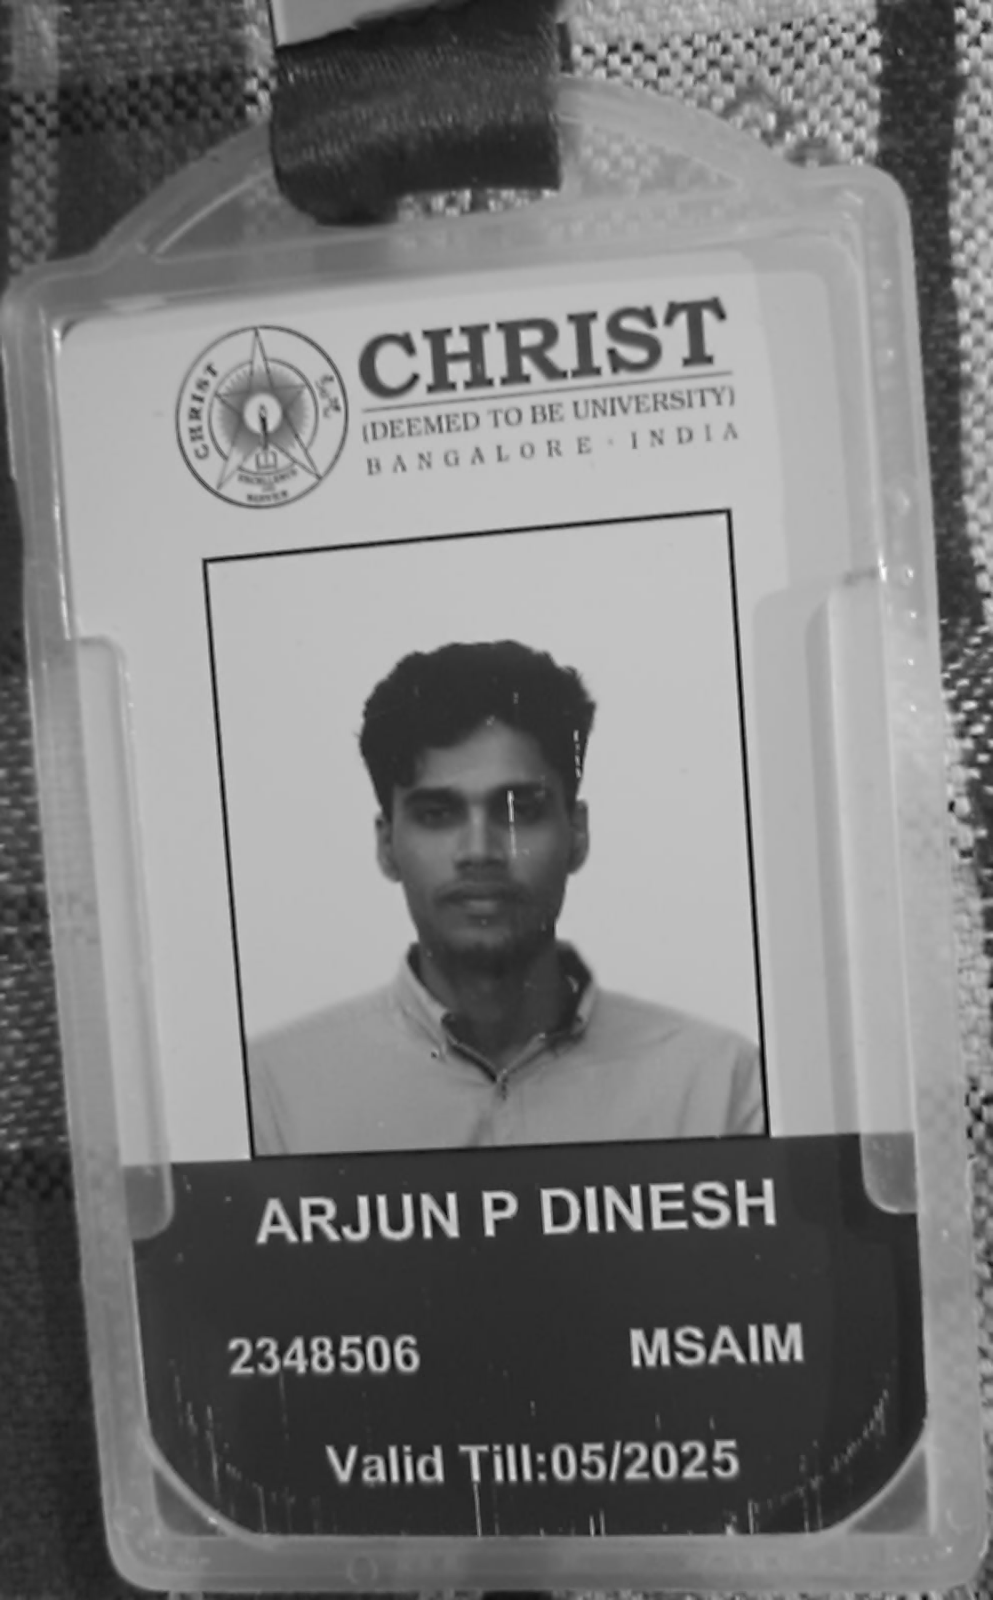

In [13]:
# Apply mid-point filter and display
mid_point_filtered = mid_point_filter(input_image, 3)
print("Mid-point Filtered Image:")
cv2_imshow(mid_point_filtered)

Alpha-trimmed Filtered Image:


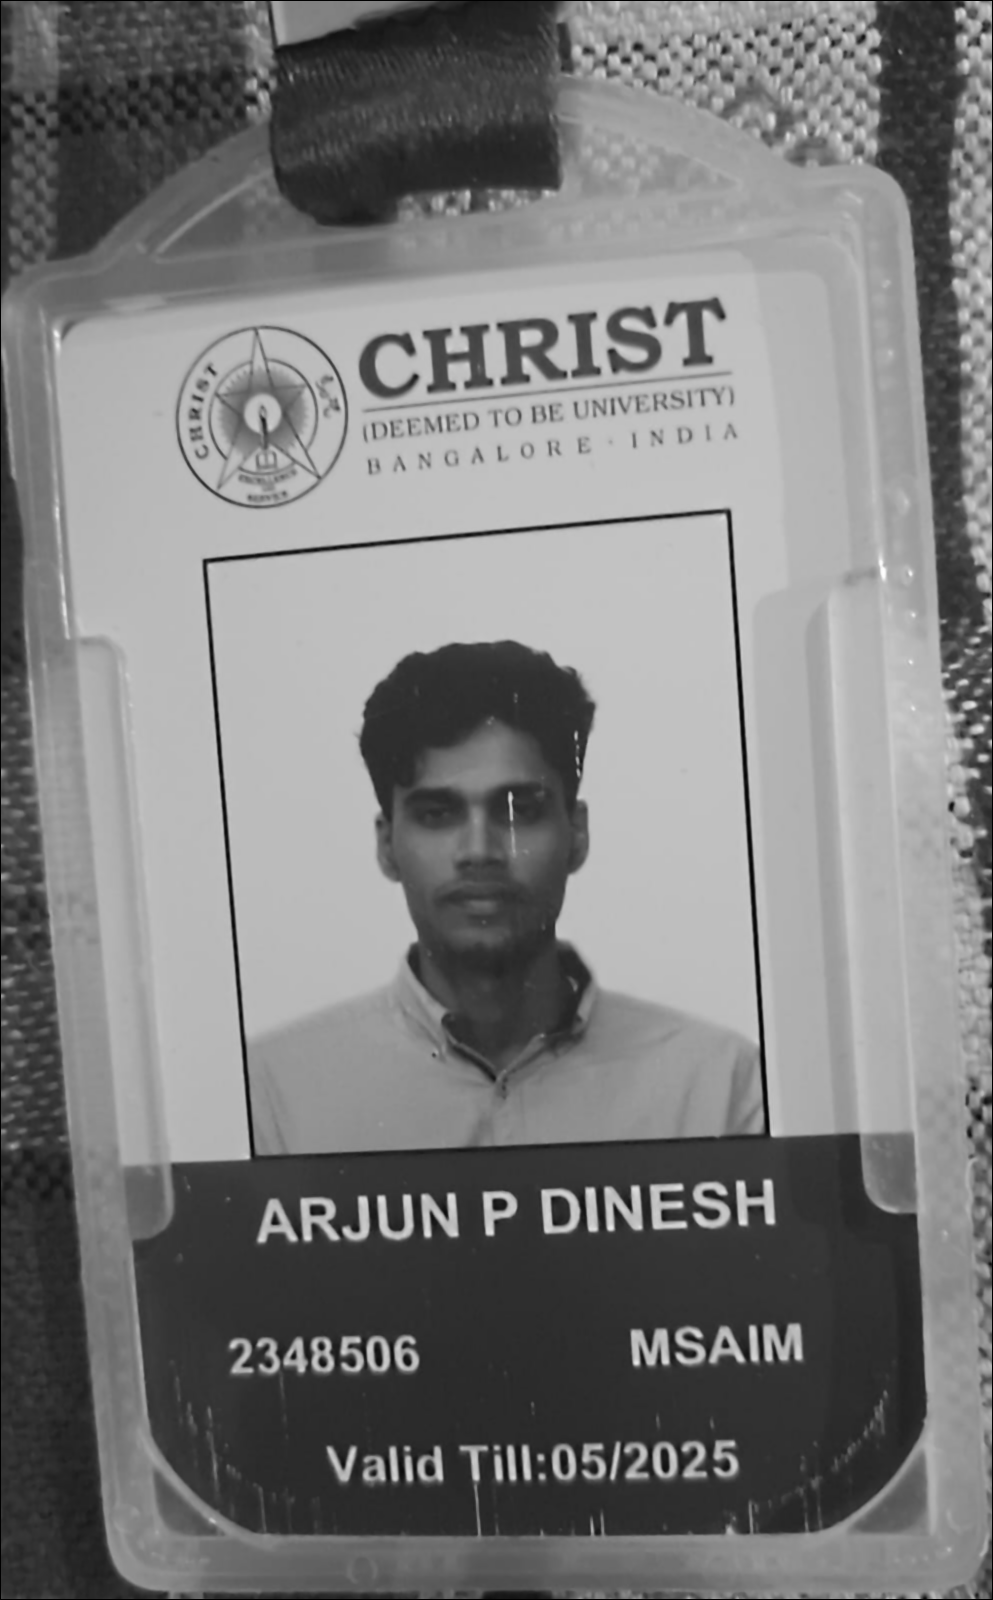

In [15]:
# Apply alpha-trimmed filter and display
alpha_trimmed_filtered = alpha_trimmed_filter(input_image, 3, 2)
print("Alpha-trimmed Filtered Image:")
cv2_imshow(alpha_trimmed_filtered)
